In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
df = pd.read_csv("C:/Users/Dell/Downloads/Python_PoweBI/dataset_udemy.csv")

In [15]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [17]:
df.shape

(3678, 12)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [21]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [23]:
df = df.drop(columns=['url'])

In [25]:
df['is_paid'] = df['is_paid'].astype(str)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   is_paid              3678 non-null   object 
 3   price                3678 non-null   int64  
 4   num_subscribers      3678 non-null   int64  
 5   num_reviews          3678 non-null   int64  
 6   num_lectures         3678 non-null   int64  
 7   level                3678 non-null   object 
 8   content_duration     3678 non-null   float64
 9   published_timestamp  3678 non-null   object 
 10  subject              3678 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 316.2+ KB


In [29]:
df.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [31]:
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   is_paid              3678 non-null   object             
 3   price                3678 non-null   int64              
 4   num_subscribers      3678 non-null   int64              
 5   num_reviews          3678 non-null   int64              
 6   num_lectures         3678 non-null   int64              
 7   level                3678 non-null   object             
 8   content_duration     3678 non-null   float64            
 9   published_timestamp  3678 non-null   datetime64[ns, UTC]
 10  subject              3678 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(4)
memory usage: 316.2+ KB

In [37]:
df[df.duplicated()]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,185526,MicroStation - Células,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [39]:
df = df.drop_duplicates()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3672 non-null   int64              
 1   course_title         3672 non-null   object             
 2   is_paid              3672 non-null   object             
 3   price                3672 non-null   int64              
 4   num_subscribers      3672 non-null   int64              
 5   num_reviews          3672 non-null   int64              
 6   num_lectures         3672 non-null   int64              
 7   level                3672 non-null   object             
 8   content_duration     3672 non-null   float64            
 9   published_timestamp  3672 non-null   datetime64[ns, UTC]
 10  subject              3672 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(5), object(4)
memory usage: 344.2+ KB


In [81]:
count_is_paid = df['is_paid'].value_counts()

In [83]:
count_is_paid

is_paid
True     3362
False     310
Name: count, dtype: int64

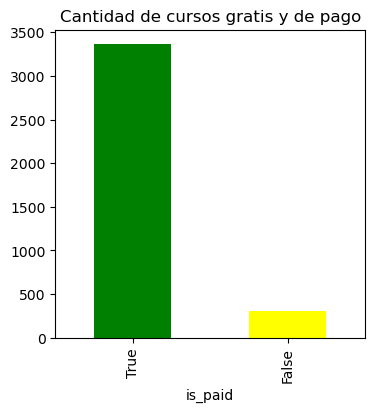

In [212]:
plt.figure(figsize=(4,4))
count_is_paid.plot(kind='bar', color = ['green', 'yellow'])
plt.title('Cantidad de cursos gratis y de pago');

In [94]:
count_is_level = df['level'].value_counts()

In [96]:
count_is_level

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

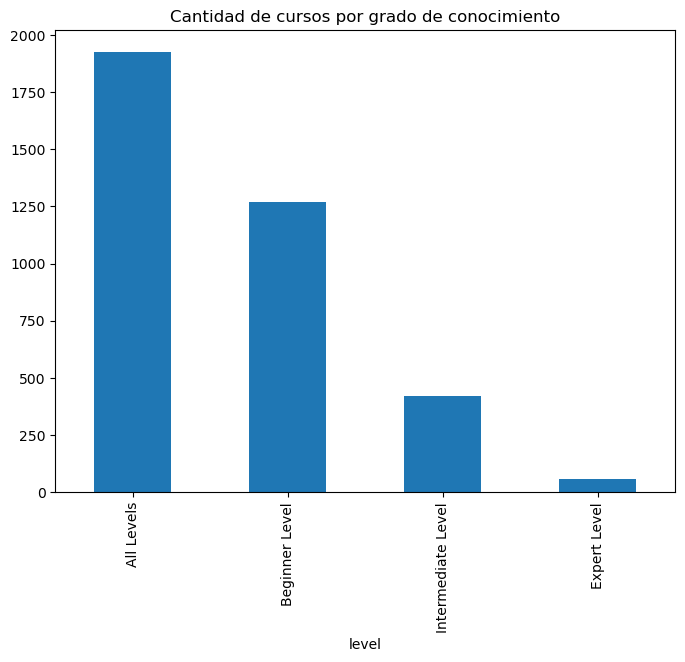

In [210]:
plt.figure(figsize=(8,6))
count_is_level.plot(kind='bar')
plt.title('Cantidad de cursos por grado de conocimiento');

In [106]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])


In [108]:
df['year'] = df['published_timestamp'].dt.year

In [116]:
agrupadas_df = df.groupby(['year', 'subject']).count()['course_id'].unstack().fillna(0)

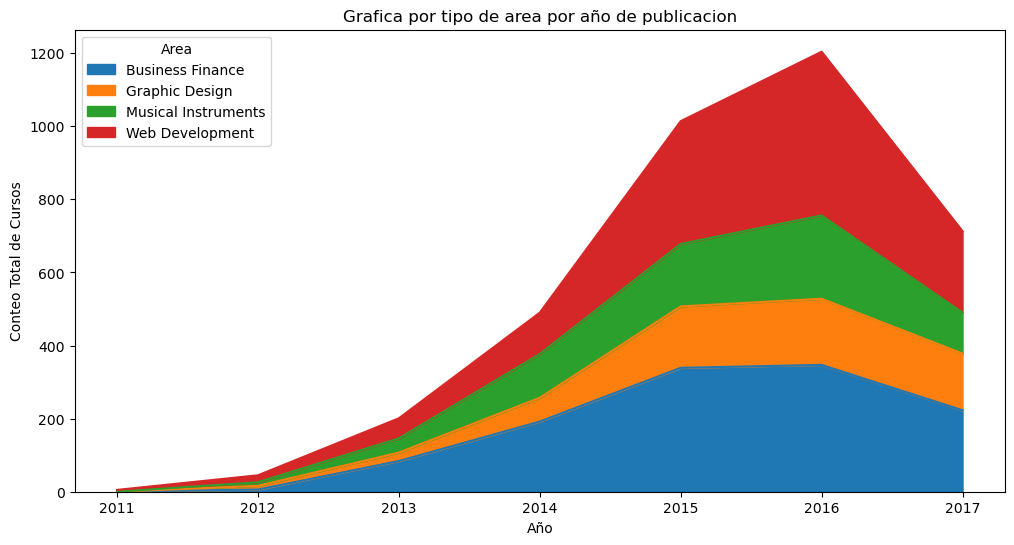

In [124]:
agrupadas_df.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Grafica por tipo de area por año de publicacion')
plt.xlabel('Año')
plt.ylabel('Conteo Total de Cursos')
plt.legend(title='Area')
plt.show()

In [144]:
agrupacion_subject_promprice_df = df.groupby('subject')['price'].mean()

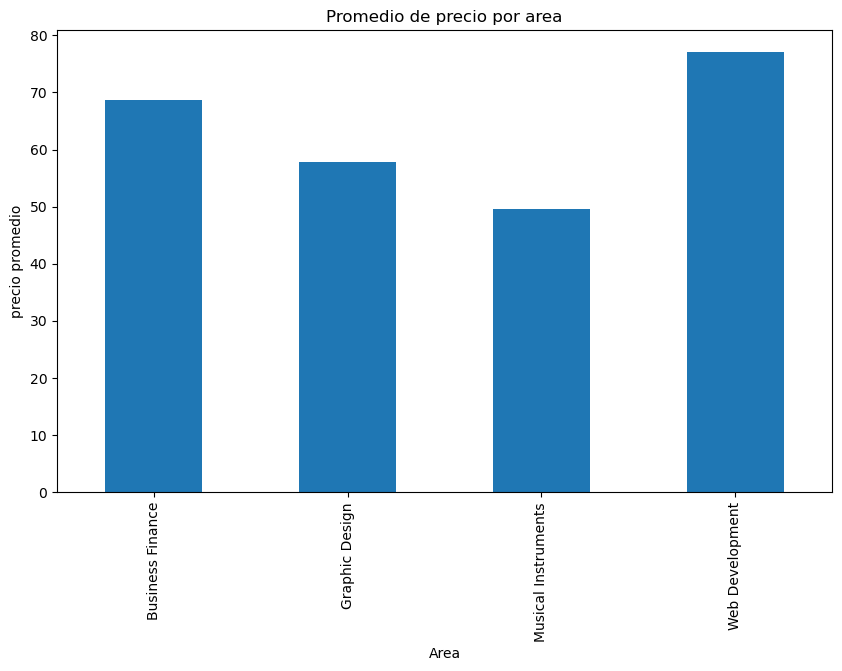

In [208]:
agrupacion_subject_promprice_df.plot(kind='bar', figsize=(10, 6))
plt.title('Promedio de precio por area')
plt.ylabel('precio promedio')
plt.xlabel('Area');

In [154]:
agrupacion_subject_level_df = df.groupby(['subject', 'level']).count()['course_id'].unstack().fillna(0)

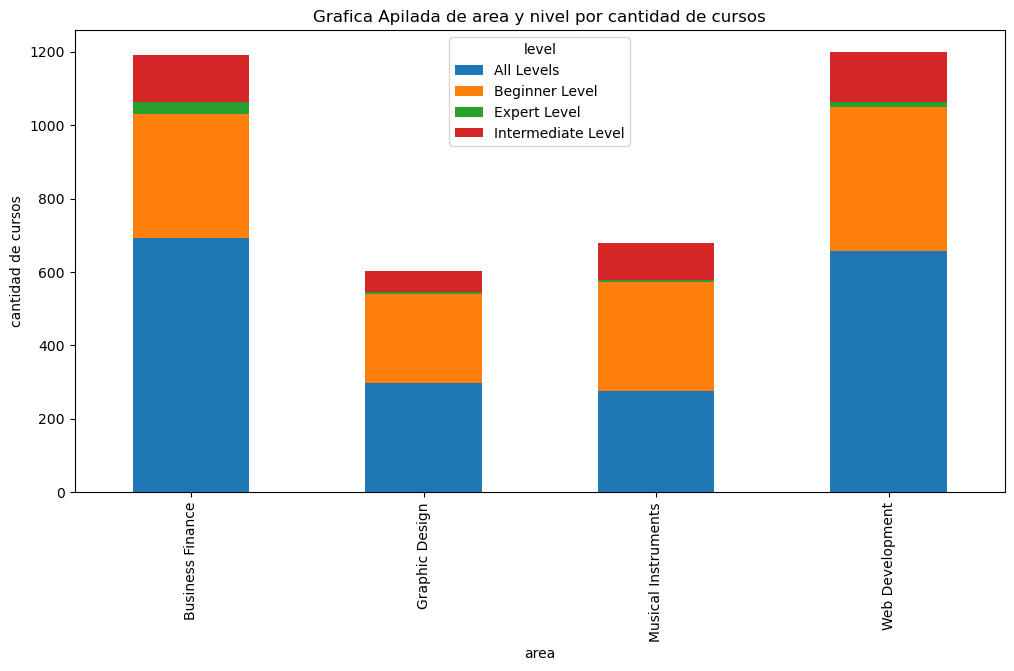

In [206]:
agrupacion_subject_level_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Grafica Apilada de area y nivel por cantidad de cursos')
plt.xlabel('area')
plt.ylabel('cantidad de cursos');

In [176]:
reviews_subject_df = df.groupby('subject')['num_reviews'].sum()

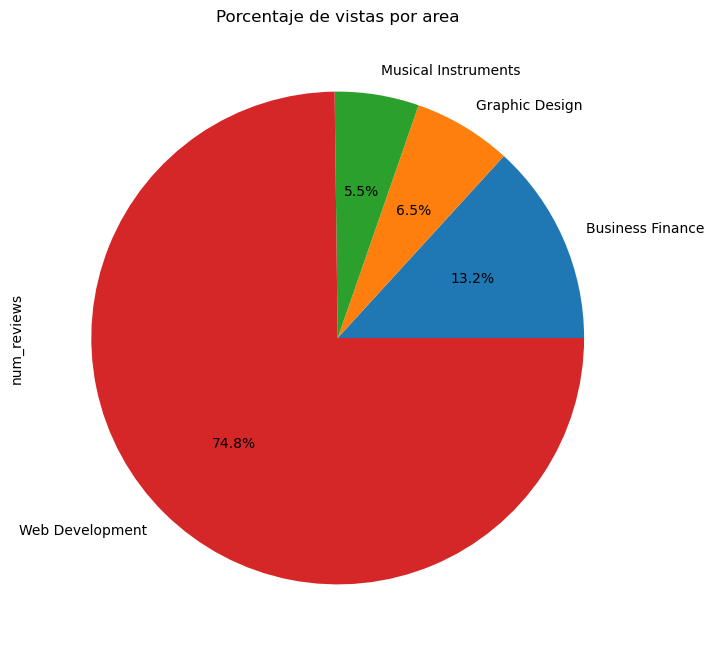

In [204]:
reviews_subject_df.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Porcentaje de vistas por area');

In [180]:
subscribers_subject_df = df.groupby('subject')['num_subscribers'].sum()

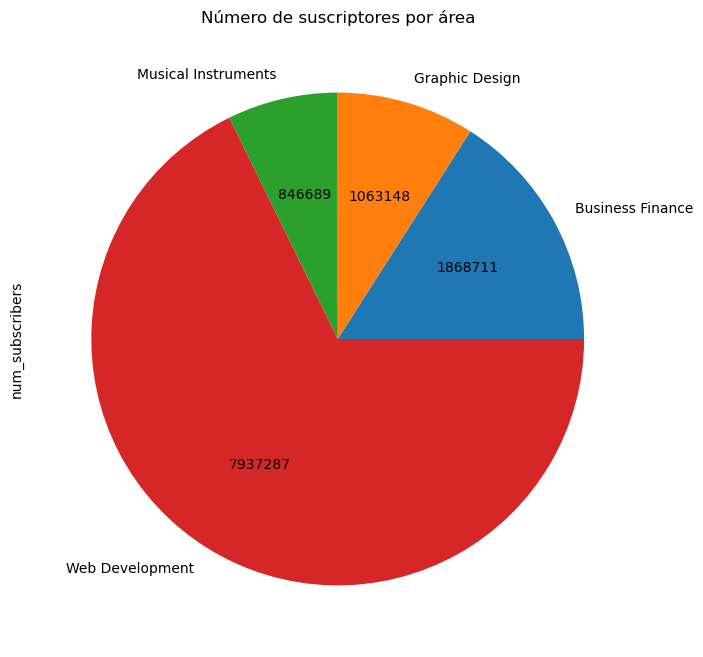

In [202]:
subscribers_subject_df.plot(
    kind='pie',
    labels=subscribers_subject_df.index,
    autopct=lambda p: '{:.0f}'.format(p * sum(subscribers_subject_df) / 100),
    figsize=(8, 8)
)

plt.title('Número de suscriptores por área');

In [220]:
top10_courses_title = df.nlargest(10, 'num_subscribers')[['course_title', 'num_subscribers']]


In [222]:
top10_courses_title

,course_title,num_subscribers
2827,Learn HTML5 Programming From Scratch,268923
3032,Coding for Entrepreneurs Basic,161029
3230,The Web Developer Bootcamp,121584
2783,Build Your First Website in 1 Week with HTML5 ...,120291
3232,The Complete Web Developer Course 2.0,114512
1896,Free Beginner Electric Guitar Lessons,101154
2589,Web Design for Web Developers: Build Beautiful...,98867
2619,Learn Javascript & JQuery From Scratch,84897
3289,Practical PHP: Master the Basics and Code Dyna...,83737
3247,JavaScript: Understanding the Weird Parts,79612


In [224]:
top10_courses_reviews = df.nlargest(10, 'num_reviews')[['course_title', 'num_reviews']]

In [226]:
top10_courses_reviews

,course_title,num_reviews
3230,The Web Developer Bootcamp,27445
3232,The Complete Web Developer Course 2.0,22412
3204,Angular 4 (formerly Angular 2) - The Complete ...,19649
3247,JavaScript: Understanding the Weird Parts,16976
3254,Modern React with Redux,15117
3246,Learn and Understand AngularJS,11580
3251,Learn and Understand NodeJS,11123
2827,Learn HTML5 Programming From Scratch,8629
3228,Angular 2 with TypeScript for Beginners: The P...,8341
1979,Pianoforall - Incredible New Way To Learn Pian...,7676
